# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, I will be working with TMDb (The Movie Database) movie dataset. This dataset contains information on approximately 11,000 movies collected from TMDb between the years 1960 and 2015, including user ratings, budget, revenue and the inflation rate of the budget and revenue by 2010. There are overall 21 elements of each movie counted. I would like to find other interesting patterns in the dataset. 


### Questions for Analysis
> Throughout this project, I will answer the following questions:
    1. Did the films with the highest investments bring in the highest returns, what is the overall and average ratio between the two?
    2. Which genres are most popular from year to year? 
    3. Who is the most frequent cast, director and production company in this dataset?
    4. What is the movie with the highest and lowest revenue and other associated values of this movie?
    

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

> After examining the dataset and questions related to this dataset, for analysis, I will save only the relevant data and delete data that are not necessarily useful for my analysis.


### General Properties
> I will start with loading the dataset and print out a few lines. i will perform operations to inspect data types and look for instances of missing or possibly errant data.

In [283]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To display the last rows of the dataset, I will simply use Pandas's tail() method:

In [284]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [285]:
df.shape

(10866, 21)

**The result above shows that the dataset contains 10,866 rows and 21 columns.**

In [286]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Looking at the results above, we can see that there are some zero values in the **budget** and **revenue** columns. Because their minimum, 25% and 50% values are all zero which is not the case. To make sure there are indeed these zero values, we will display them using the pandas Query method.

In [287]:
zero_budget_value = df.query('budget == 0')
zero_budget_value

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [288]:
zero_revenue_value = df.query('revenue == 0')
zero_revenue_value

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


It seems there are a lot of zeroes. Let's count them.

In [289]:
(df['budget'] == 0).sum()

5696

In [290]:
(df['revenue'] == 0).sum()

6016

In [291]:
(df['runtime'] == 0).sum()

31

There are really a lot of zeros in the 'budget' and 'revenue' columns. But I will not delete them, otherwise I will lose the most important properties for my analysis. I will continue with existing non-zero values and replace all zeros with mean. On the other hand, it's not too much for the 'runtime' column. I'll replace them with the mean of the corresponding column.

In [292]:
df['budget'] = df['budget'].replace(0, df['budget'].mean())

In [293]:
df['revenue'] = df['revenue'].replace(0, df['revenue'].mean())

In [294]:
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())

Let's check if I have successfully replaced the zeros with the mean.

In [295]:
(df['budget'] == 0).sum()

0

In [296]:
(df['revenue'] == 0).sum()

0

In [297]:
(df['runtime'] == 0).sum()

0

Yes!!! zeros are successfully replaced with the mean. Next, I will check how many missing values in each column.

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj         

In [299]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,1.350000e+08,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,1.080000e+08,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,7.400000e+07,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94.0,Com

The result above shows that the columns **cast**, **homepage**, **tagline**, **keywords**, **overview**, **genres** and **production_companies** have missing values. In the next part of this section, I will clean up the dataset.


### Data Cleaning
> After discussing the structure of the data and any problems that need to be cleaned, I perform those cleaning steps in this part of this section.

In [300]:
# I'll start looking at if there are duplicate rows in this dataset
sum(df.duplicated())

1

We can see that there is only one duplicate row. I display it as follows:

In [301]:
duplicate = df[df.duplicated()]
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


I will just drop this row and then deal with the missing values.

In [302]:
df.drop_duplicates(inplace=True)

In [303]:
# I will check if that row is deleted
sum(df.duplicated())

0

Next I will drop some columns with missing values that are not useful for my analysis.

In [304]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [305]:
df.shape

(10865, 16)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 1.4+ MB


Let's check how many columns have null values

In [307]:
df.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Now, I will replace these null values with the most frequent values. I can do this by taking the index of the most common class which can be determined by using the following Python function. The idea is to fill each column with its most common value. Basically, the function will take one argument, which serves as the certain column indicator of a specific column. Inside this function, I want to count the most frequent value of that corresponding column using the pandas value_counts() method, and as a result I get all the values of the corresponding column in descending order from most common to least common. Then I select the first index of these list of values using the Pandas index() class. I will use them as an argument to my function, which is attached to this exact specific column indicator. Finally, I need to return the same column indicator. To apply this function to each column, I just use a Python lambda function. Let's get started.

In [308]:
def fillna(x):
    x.fillna(x.value_counts().index[0], inplace=True)
    return x

df_clean = df.apply(lambda x:fillna(x))

Now let's check if we succeeded in replacing the most common value of each column.

In [309]:
df_clean.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Success!!! Now, our dataset is clean and ready to explore.

In [310]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null float64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 1.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned my data, I're ready to move on to exploration. I'll compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. I will compute the relevant statistics throughout the analysis when an inference is made about the data.

### Research Question 1: Did the films with the highest investments bring in the highest returns, what is the overall and average ratio between the two?

First of all, let's check the basic properties of our cleaned dataset.

In [311]:
df_clean

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,1.350000e+08,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,1.080000e+08,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,7.400000e+07,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [312]:
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229184e+07,6.187725e+07,102.363019,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,2.801364e+07,1.110239e+08,30.904043,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,3.982332e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's display general illustrations of our cleaned dataset and then write first general conclusions.

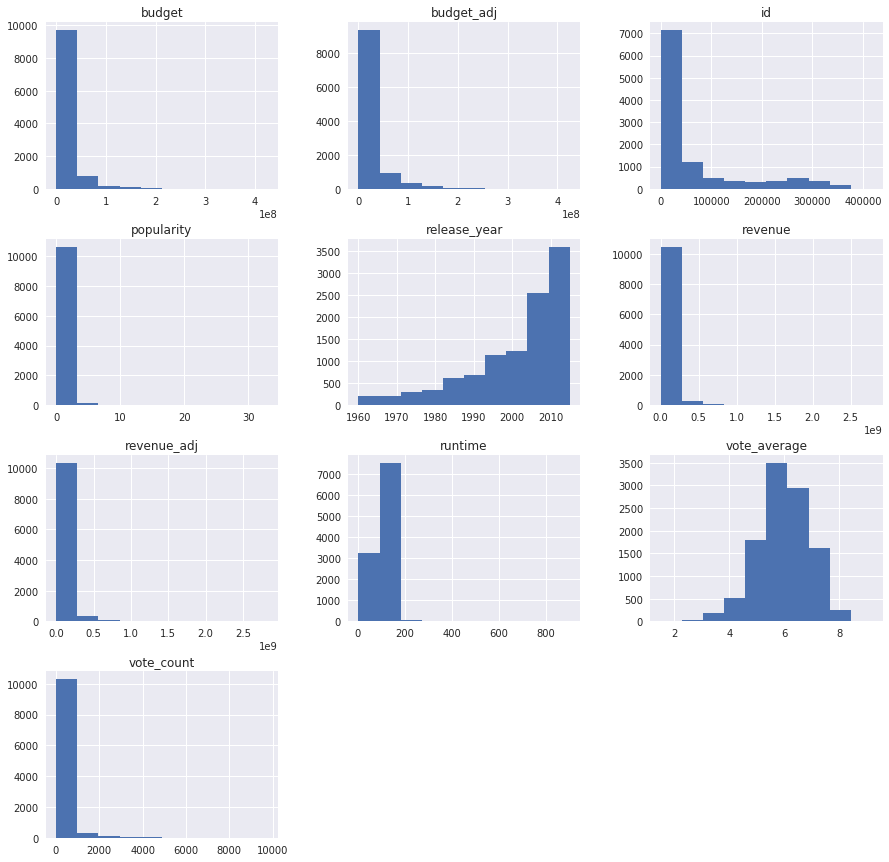

In [313]:
df_clean.hist(figsize=(15, 15));

The result above shows only the illustrations of numerical values. Despite this limitation, we can make the following very general summary of existed properties above:
   1. There is a positive correlation between the budget and revenue columns. To see the correlation between the two, I               will plot them using matplotlib.
   2. The majority of the movies are created in the last two decades.

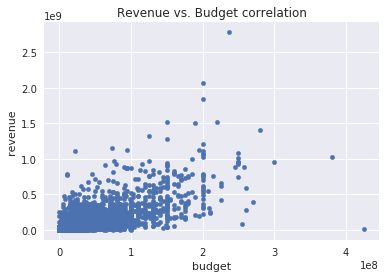

In [314]:
df_clean.plot(x = 'budget', y = 'revenue', kind='scatter', title='Revenue vs. Budget correlation');

The scatter chart above shows the correlation between the revenue and budget columns. We see that the correlation is positive. Alternatively, using matplotlib.pyplot we get a better view.

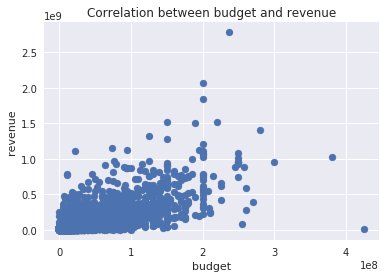

In [315]:
plt.scatter(df_clean['budget'], df_clean['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Correlation between budget and revenue')
plt.show()

The second chart above is more better. We can now answer the first part of our question that high spendings indeed brought higher incomes. For the second part we act as follows:

In [316]:
ratio = df_clean['budget'] / df_clean['revenue']  
ratio

0        0.099106
1        0.396368
2        0.372581
3        0.096703
4        0.126141
5        0.253307
6        0.351790
7        0.181397
8        0.063973
9        0.204988
10       0.278196
11       0.956586
12       0.406841
13       0.361193
14       0.199283
15       0.282486
16       0.147343
17       0.250674
18       0.175163
19       0.245956
20       0.908936
21       0.327119
22       0.233798
23       0.070218
24       0.209979
25       0.219835
26       0.315014
27       0.200593
28       0.226381
29       0.195980
           ...   
10836    0.367265
10837    0.367265
10838    0.367265
10839    0.367265
10840    0.367265
10841    0.001883
10842    0.367265
10843    0.367265
10844    0.367265
10845    0.367265
10846    0.367265
10847    0.367265
10848    0.426250
10849    0.367265
10850    0.367265
10851    0.367265
10852    0.367265
10853    0.367265
10854    0.367265
10855    0.017578
10856    0.367265
10857    0.367265
10858    0.367265
10859    0.367265
10860    0

In [317]:
ratio_mean = df_clean['revenue'].mean() / df_clean['budget'].mean()

In [318]:
ratio_mean

2.7757800427684804

#### Summary of research question 1: 
The illustrations above show that there is a positive correlation between money spent and income. This means that the higher the budget, the higher the income. They always had more or less profit. The average income is almost 3 times bigger the average budget.

### Research Question 2: Which genres are most popular from year to year?

In order to address this question, we mainly use the columns "genre" and "release_year". First, we need to split the genre by ' | '. We need to count how many unique genres are there. Let's get started!

In [319]:
df_clean['genres'].value_counts()

Comedy                                             735
Drama                                              712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
Comedy|Romance                                     268
Horror|Thriller                                    259
Horror                                             253
Comedy|Drama|Romance                               222
Drama|Thriller                                     138
Comedy|Family                                      102
Action|Thriller                                    101
Thriller                                            93
Drama|Comedy                                        92
Animation|Family                                    90
Crime|Drama|Thriller                                81
Crime|Drama                                         74
Comedy|Horror                                       72
Drama|Come

In [320]:
df_clean['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

It is difficulut to see how many unique genres are there.  Therefore, let's get all genres separated and then count once again.

In [321]:
genres_splitted = df_clean['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
genres_splitted.name = 'genres_splitted'
df_genres_splitted = df_clean.drop(['genres'], axis=1).join(genres_splitted)
df_genres_splitted

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_splitted
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [322]:
genres_splitted.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [323]:
genres_splitted.nunique()

20

We now know that there are overall 20 unique genres. We will now plot the following barchart to determine the overall frequency of each unique geners.

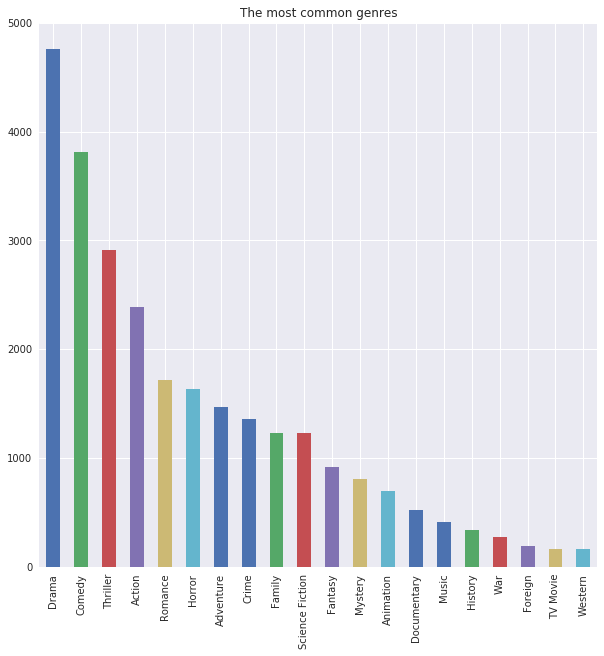

In [324]:
df_genres_splitted['genres_splitted'].value_counts().plot(kind='bar', figsize=(10,10), title='The most common genres');

The barchart above shows the total frequency of each movie genre over the entire duration specified in the dataset. I will next use the pandas groupby() and value_counts() methods to figure out the relationship between the frequency of occurrence of each genre in different years. As a result, I can answer a question that whether the frequency of genres is increased or decreased year by year. I will also illustrate them using simple linecharts so that it can be clearer at glance to everyone.

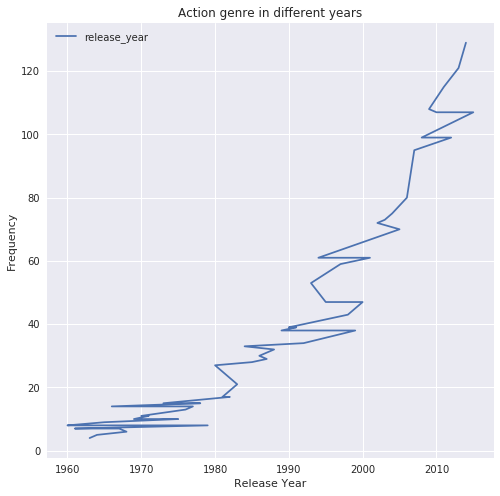

In [325]:
dgf = df_genres_splitted.groupby('genres_splitted')['release_year'].value_counts()
ax = dgf['Action'].plot(kind='line', figsize=(8,8), legend=True, title='Action genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the action genre has grown in popularity from year to year. In particular, it has become more popular in the last two decades of the entire duration specified in the dataset.

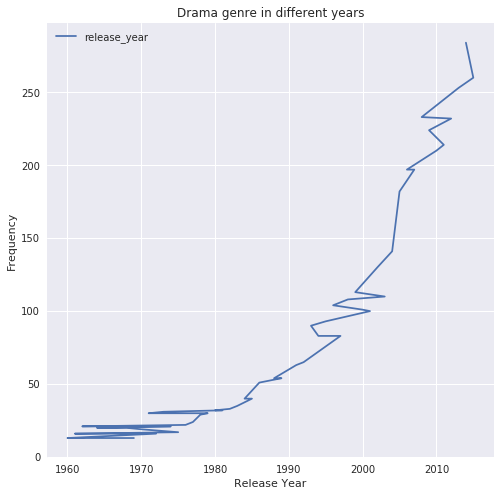

In [326]:
ax = dgf['Drama'].plot(kind='line', figsize=(8,8), legend=True, title='Drama genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The graph above shows that the drama genre also has grown in popularity from year to year. In particular, it has become more popular in the last three decades of the entire duration specified in the dataset.

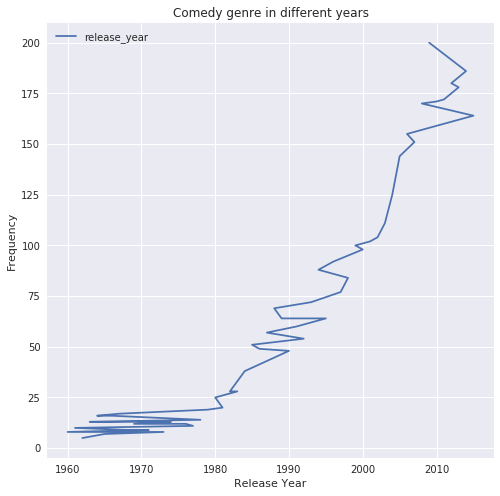

In [327]:
ax = dgf['Comedy'].plot(kind='line', figsize=(8,8), legend=True, title='Comedy genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the comedy genre also has grown in popularity from year to year. In particular, it has become more popular in the last three decades of the entire duration specified in the dataset.

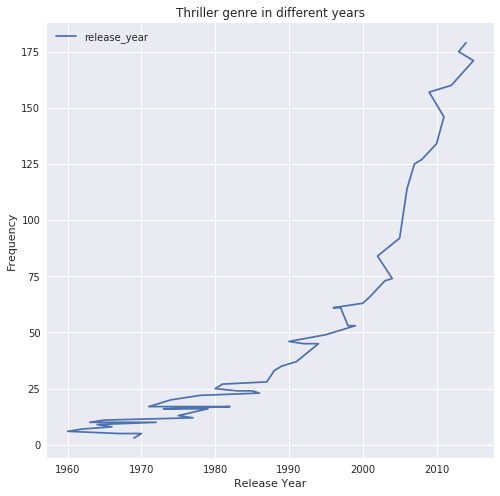

In [328]:
ax = dgf['Thriller'].plot(kind='line', figsize=(8,8), legend=True, title='Thriller genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the thriller genre has also grown in popularity from year to year. In particular, it has become more popular in the last three decades of the entire duration specified in the dataset.

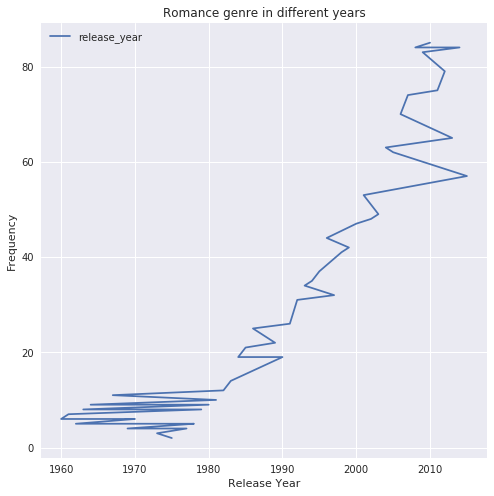

In [329]:
ax = dgf['Romance'].plot(kind='line', figsize=(8,8), legend=True, title='Romance genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The graph above shows that the romance genre has also grown in popularity from year to year. In particular, it has become more popular in the last three decades of the entire duration specified in the dataset.

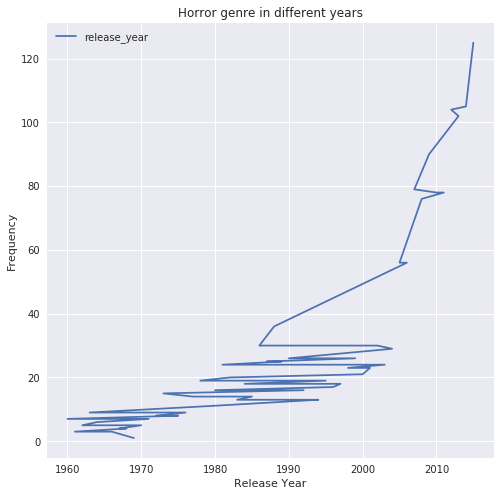

In [330]:
ax = dgf['Horror'].plot(kind='line', figsize=(8,8), legend=True, title='Horror genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the horror genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

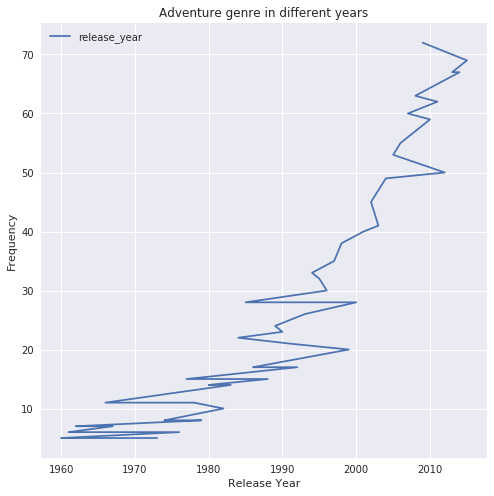

In [331]:
ax = dgf['Adventure'].plot(kind='line', figsize=(8,8), legend=True, title='Adventure genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the adventure genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

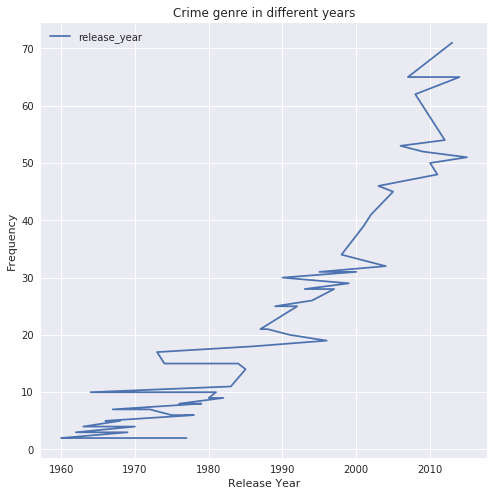

In [332]:
ax = dgf['Crime'].plot(kind='line', figsize=(8,8), legend=True, title='Crime genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the crime genre has also grown in popularity from year to year. In particular, it has become more popular in the last two decades of the entire duration specified in the dataset.

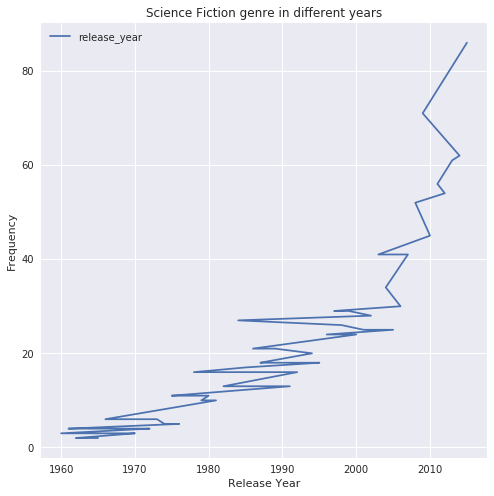

In [333]:
ax = dgf['Science Fiction'].plot(kind='line', figsize=(8,8), legend=True, title='Science Fiction genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the SciFi genre has also grown in popularity from year to year. In particular, it has become more popular in the last two decades of the entire duration specified in the dataset.

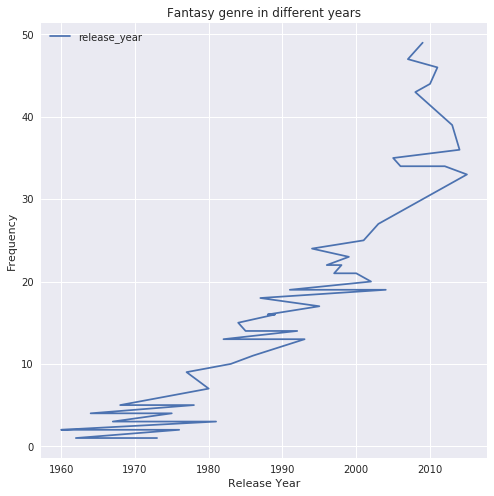

In [334]:
ax = dgf['Fantasy'].plot(kind='line', figsize=(8,8), legend=True, title='Fantasy genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the fantasy genre has also grown in popularity from year to year. In particular, it has become more popular in the last three decades of the entire duration specified in the dataset.

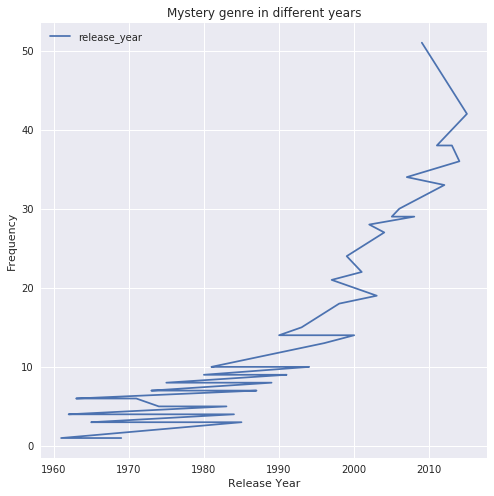

In [335]:
ax = dgf['Mystery'].plot(kind='line', figsize=(8,8), legend=True, title='Mystery genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the mystry genre has also grown in popularity from year to year. In particular, it has become more popular in the last two decades of the entire duration specified in the dataset.

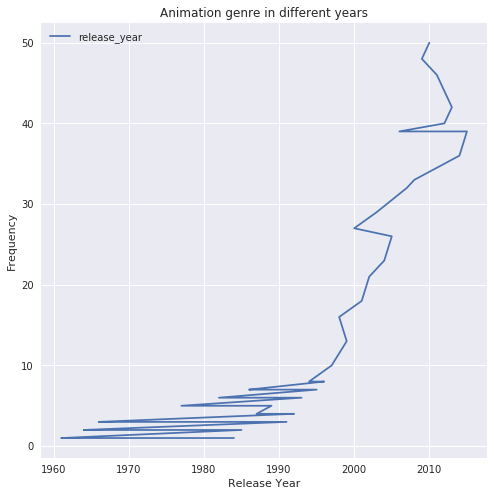

In [336]:
ax = dgf['Animation'].plot(kind='line', figsize=(8,8), legend=True, title='Animation genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the animation genre has also grown in popularity from year to year. In particular, it has become more popular in the last two decades of the entire duration specified in the dataset.

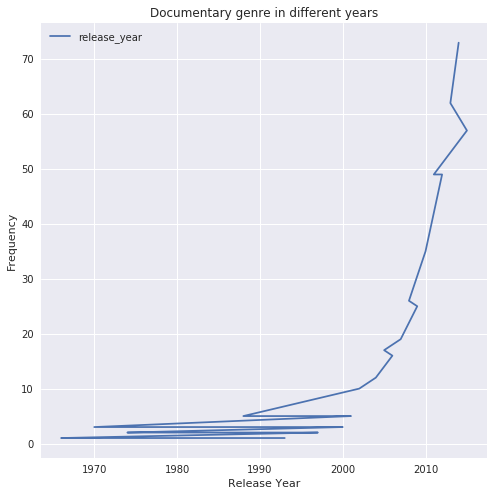

In [337]:
ax = dgf['Documentary'].plot(kind='line', figsize=(8,8), legend=True, title='Documentary genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The graph above shows that the documentary genre has grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

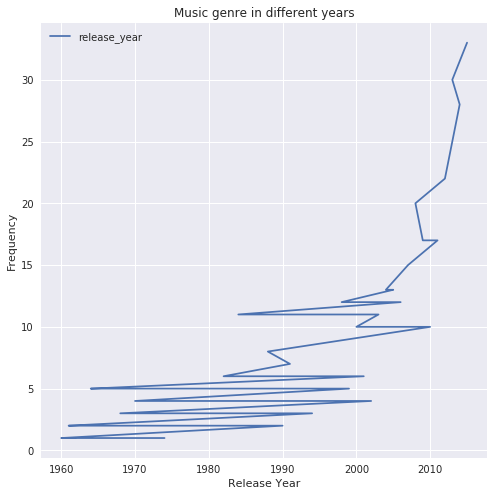

In [338]:
ax = dgf['Music'].plot(kind='line', figsize=(8,8), legend=True, title='Music genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the music genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

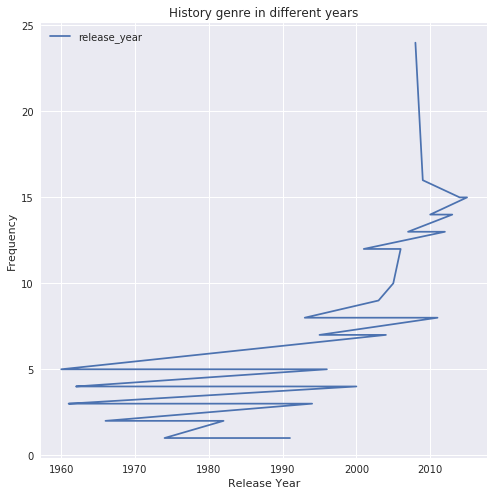

In [339]:
ax = dgf['History'].plot(kind='line', figsize=(8,8), legend=True, title='History genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the history genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

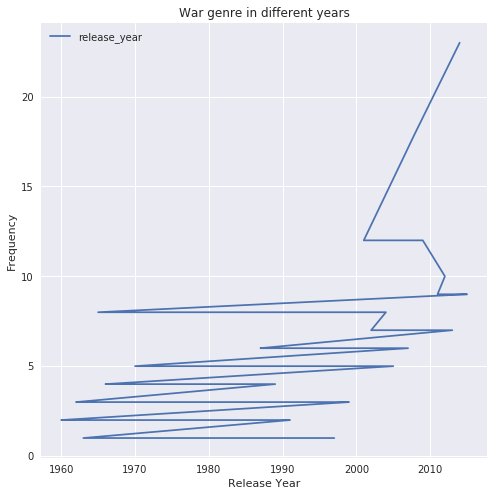

In [340]:
ax = dgf['War'].plot(kind='line', figsize=(8,8), legend=True, title='War genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the war genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

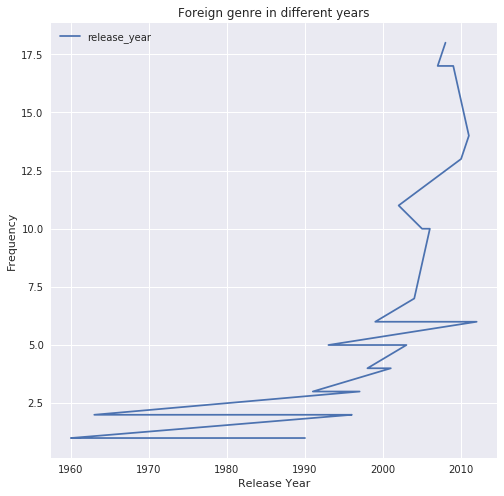

In [341]:
ax = dgf['Foreign'].plot(kind='line', figsize=(8,8), legend=True, title='Foreign genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the foregn genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

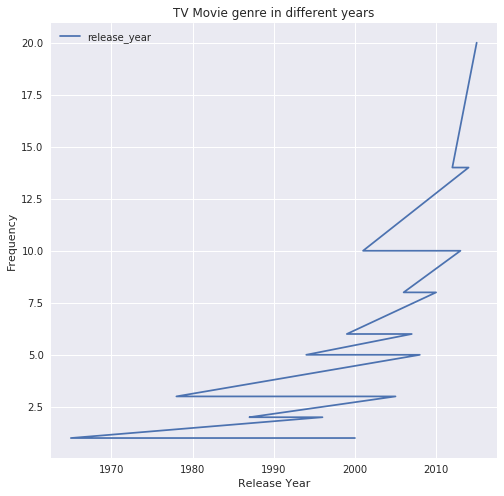

In [342]:
ax = dgf['TV Movie'].plot(kind='line', figsize=(8,8), legend=True, title='TV Movie genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The line graph above shows that the TV Movie genre has also grown in popularity from year to year. In particular, it has become more popular in the last decade of the entire duration specified in the dataset.

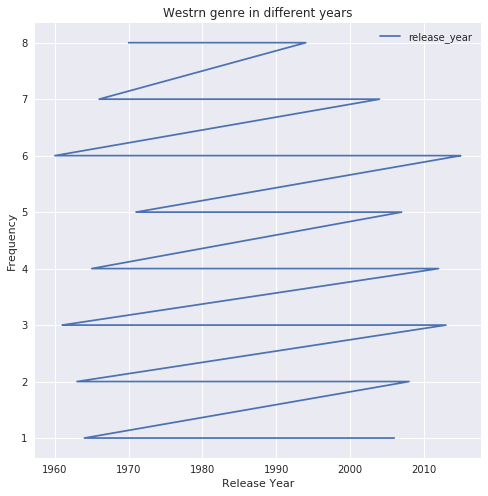

In [343]:
ax = dgf['Western'].plot(kind='line', figsize=(8,8),  legend=True, title='Westrn genre in different years');
ax.set_xlabel("Release Year");
ax.set_ylabel("Frequency");

The last line graph above shows that the western genre has grown in popularity very slowly from year to year of the entire duration specified in the dataset.

#### Summary of research question 2:
The line graphs above show that overall all genres have grown in popularity from year to year, some of them slowly and others rapidly. In particular, in last 2-3 decades. Moreover, the graphs show that the least popular genre was the Western genre while the most popular genre was the Drama genre. Moreover, from year to year, the genres of Comedy, Thriller, Action and Horror became very popular.

### Research Question 3: Who is the most frequent cast, director and production company in this dataset?

To address this question, I'll be looking for the corresponding columns and separate the values in each column. Let's first observe these columns what they look like.

In [344]:
df_clean['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
5        Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
6        Arnold Schwarzenegger|Jason Clarke|Emilia Clar...
7        Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...
8        Sandra Bullock|Jon Hamm|Michael Keaton|Allison...
9        Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...
10       Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...
11       Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...
12       Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...
13       Adam Sandler|Michelle Monaghan|Peter Dinklage|...
14       Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...
15       Samuel L. Jackson|Kurt Russell|Jennifer Jason ...
16       Liam Neeson|Forest Whitaker|Maggie Grace|Famke.

In [345]:
cast_splitted = df_clean['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
cast_splitted.name = 'cast_splitted'
df_cast_splitted = df_clean.drop(['cast'], axis=1).join(cast_splitted)
df_cast_splitted

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast_splitted
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Charlize Theron
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Hugh Keays-Byrne
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Nicholas Hoult
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Josh Helman


In [346]:
cast_splitted.unique()

array(['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', ...,
       'John Reynolds', 'Diane Mahree', 'Stephanie Nielson'], dtype=object)

In [347]:
cast_splitted.nunique()

19026

In [348]:
cast_splitted.value_counts()

Louis C.K.            86
Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
John Goodman          49
Morgan Freeman        49
Liam Neeson           48
Susan Sarandon        48
Julianne Moore        47
Alec Baldwin          47
Christopher Walken    46
Gene Hackman          46
Tom Hanks             46
Johnny Depp           46
Sylvester Stallone    45
Dennis Quaid          45
Willem Dafoe          45
Meryl Streep          44
Clint Eastwood        44
Ed Harris             44
Donald Sutherland     44
Antonio Banderas      43
Keanu Reeves          43
Robert Downey Jr.     43
Woody Harrelson       43
Ewan McGregor         43
                      ..
Sonia Casademont       1
Alan Ritchson          1
Odile Le Clezio        1
Daniel Brocklebank     1
JÅ«rÅta Kosugi         1
Marcy Goldman          1
Eric D. Hill Jr.       1
Anna Harr              1
Rocco Pitanga          1


We don't have to split director column since it has already splitted.

In [349]:
df_clean['director'].value_counts()

Woody Allen                                            89
Clint Eastwood                                         34
Steven Spielberg                                       29
Martin Scorsese                                        29
Ridley Scott                                           23
Steven Soderbergh                                      22
Ron Howard                                             22
Joel Schumacher                                        21
Brian De Palma                                         20
Tim Burton                                             19
Barry Levinson                                         19
Wes Craven                                             19
Mike Nichols                                           18
John Carpenter                                         18
Rob Reiner                                             18
David Cronenberg                                       18
Francis Ford Coppola                                   17
Spike Lee     

Lastly, we also need to split production companies.

In [350]:
df_clean['production_companies']

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
5        Regency Enterprises|Appian Way|CatchPlay|Anony...
6                  Paramount Pictures|Skydance Productions
7        Twentieth Century Fox Film Corporation|Scott F...
8            Universal Pictures|Illumination Entertainment
9        Walt Disney Pictures|Pixar Animation Studios|W...
10                            Columbia Pictures|Danjaq|B24
11       Village Roadshow Pictures|Dune Entertainment|A...
12       DNA Films|Universal Pictures International (UP...
13             Columbia Pictures|Happy Madison Productions
14       Marvel Studios|Prime Focus|Revolution Sun Studios
15       Double Feature Films|The Weinstein Company|Fil...
16       Twentieth Century Fox Film Corporation|M6 Film.

In [351]:
prodc_splitted = df_clean['production_companies'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
prodc_splitted.name = 'prodc_splitted'
df_prodc_splitted = df_clean.drop(['production_companies'], axis=1).join(prodc_splitted)
df_prodc_splitted

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,prodc_splitted
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Amblin Entertainment
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Legendary Pictures
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Fuji Television Network
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Dentsu
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Kennedy Miller Productions
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Mandeville Films
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Red Wagon Entertainment


In [352]:
prodc_splitted.unique()

array(['Universal Studios', 'Amblin Entertainment', 'Legendary Pictures',
       ..., 'Douglas & Lewis Productions', 'Benedict Pictures Corp.',
       'Norm-Iris'], dtype=object)

In [353]:
prodc_splitted.nunique()

7879

In [354]:
prodc_splitted.value_counts()

Paramount Pictures                        1461
Universal Pictures                         522
Warner Bros.                               509
Twentieth Century Fox Film Corporation     282
Columbia Pictures                          272
New Line Cinema                            219
Metro-Goldwyn-Mayer (MGM)                  218
Walt Disney Pictures                       214
Touchstone Pictures                        178
Columbia Pictures Corporation              160
TriStar Pictures                           147
Miramax Films                              139
Relativity Media                           108
Regency Enterprises                         95
Canal+                                      92
Village Roadshow Pictures                   88
20th Century Fox                            88
DreamWorks SKG                              88
BBC Films                                   87
Dimension Films                             82
United Artists                              76
Orion Picture

#### Summary of research question 3:
The above results show that American comedian, writer, actor, and director Louis C.K. was the most frequent cast for the entire period indicated in the dataset. In total, he appeared 86 times. Then Allen Woody was the most frequent director with 89 films, and Paramount Pictures turned out to be the most frequent production company with approximately 1,500 productions.

### Research Question 4: What is the movie with the highest and lowest revenue and other associated values of this movie?

To solve this question, I simply use pandas max, min and loc methods.

In [355]:
column = df_clean['revenue']
max_revenue = column.max()
max_revenue

2781505847.0

In [356]:
df.loc[df['revenue'] == max_revenue]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [357]:
min_revenue = column.min()
min_revenue

2.0

In [358]:
df.loc[df['revenue'] == min_revenue]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,11/14/03,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,10/20/95,201,6.8,1995,8.585801e+06,2.861934


#### Summary of research question 4:
The above results show that Avatar was the highest-grossing movie at around $ 3 billion. income. In the case of the lowest income movie, although I was able to display the results, they do not appear to be true values because 2 can't represent the true value here. Therefore it would better if we wouldn't have so many missing values and it would surely help us to make more accurate decisions.

<a id='conclusions'></a>
## Conclusions

>   After analyzing the dataset, I made the following main conclusions:
    1. The overall trend in the film industry has grown from year to year. Some of the genres are increased too slowly whereas the other genres are increased very quickly. In particular, the industry has grown rapidly over the last 2-3 decades of the period indicated in the dataset.
    2. The least popular genre was the Western genre while the most popular genre was the Drama genre. 
    3. From year to year, the genres of Comedy, Thriller, Action and Horror also became very popular. The rest became slowly popular.
    4. The 'budget' and 'revenue' columns of the movies are positively correlated. When they spent more money on a certain film, they received more money in return.
    5. The American comedian, writer, actor, and director Louis C.K. was the most frequent cast for the entire period indicated in the dataset. In total, he appeared 86 times. 
    6. Allen Woody was the most frequent director with 89 films in the entire duration given in the dataset.
    7. Paramount Pictures turned out to be the most frequent production company with approximately 1,500 productions.
    8. The above results show that Avatar was the highest-grossing movie with around 3 bln. USD income. 
    9. Although it was possible to display the results, they do not appear to be true values for the case of lowest income movie.
    10.Therefore it would better if we wouldn't have so many missing values and it would surely help us to make more accurate decisions.

### Limitations
> After analyzing the dataset, mainly the following limitation is observed:
    1. There is a lot of insufficient information in some columns of the dataset. In particular, in the columns "budget" and "revenue". As a result, some facts are not entirely accurate. For example, the fact about the lowest income of the film.

In [359]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0